In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('loan_sample.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,22000,22000,22000.0,36 months,9.17,701.34,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8000,8000,8000.0,36 months,5.32,240.92,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,6000,6000,6000.0,36 months,9.75,192.90,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5300,5300,5300.0,36 months,12.39,177.03,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000,8000,8000.0,36 months,12.49,267.60,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.shape

(127314, 145)

In [99]:
df.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object

In [100]:
df.isna().mean()*100

id                       100.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         97.591781
settlement_date           97.591781
settlement_amount         97.591781
settlement_percentage     97.591781
settlement_term           97.591781
Length: 145, dtype: float64

In [101]:
df = df.dropna(axis='columns')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt
0,22000,22000,22000.0,36 months,9.17,701.34,B,B2,RENT,73000.0,...,Sep-1999,2.0,7.0,0.0,33797,22.0,f,0.0,0.0,25251.046476
1,8000,8000,8000.0,36 months,5.32,240.92,A,A1,MORTGAGE,89000.0,...,Dec-2001,0.0,8.0,1.0,5405,16.0,f,0.0,0.0,8602.708787
2,6000,6000,6000.0,36 months,9.75,192.90,B,B3,RENT,65000.0,...,Oct-2004,0.0,17.0,0.0,27715,27.0,w,0.0,0.0,6518.164684
3,5300,5300,5300.0,36 months,12.39,177.03,C,C1,MORTGAGE,53486.0,...,Jun-1991,0.0,18.0,0.0,31609,35.0,w,0.0,0.0,6369.200907
4,8000,8000,8000.0,36 months,12.49,267.60,B,B5,MORTGAGE,72550.0,...,Jul-1979,0.0,7.0,0.0,5880,25.0,w,0.0,0.0,9633.193533


In [102]:
df.isna().mean()

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
purpose                0.0
zip_code               0.0
addr_state             0.0
delinq_2yrs            0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_bal              0.0
total_acc              0.0
initial_list_status    0.0
out_prncp              0.0
out_prncp_inv          0.0
total_pymnt            0.0
dtype: float64

In [103]:
df.shape

(127314, 28)

In [104]:
df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status              int64
pymnt_plan              object
purpose                 object
zip_code                object
addr_state              object
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal                int64
total_acc              float64
initial_list_status     object
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
dtype: object

In [105]:
df['loan_status'].value_counts()

0    101716
1     25598
Name: loan_status, dtype: int64

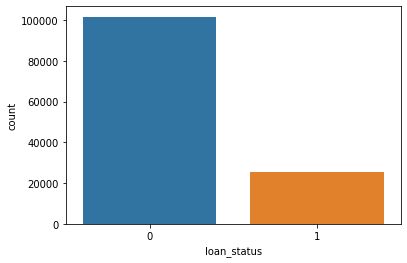

In [106]:
sns.countplot(df['loan_status'])

In [107]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt
count,127314.000000,127314.000000,127314.000000,127314.000000,127314.000000,1.273140e+05,127314.000000,127314.000000,127314.000000,127314.000000,127314.000000,1.273140e+05,127314.000000,127314.000000,127314.000000,127314.000000
mean,14433.164656,14424.530884,14401.107924,13.245526,438.821900,7.618913e+04,0.201062,0.314899,0.659299,11.572938,0.218805,1.623791e+04,24.975957,0.334874,0.334874,14810.533048
std,8708.248460,8703.630933,8706.056443,4.744872,261.415501,6.843703e+04,0.400796,0.874283,0.938963,5.455621,0.616090,2.184528e+04,11.924768,70.089007,70.089007,10337.694666
min,500.000000,500.000000,0.000000,5.310000,14.770000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,7900.000000,9.750000,248.820000,4.600000e+04,0.000000,0.000000,0.000000,8.000000,0.000000,5.960250e+03,16.000000,0.000000,0.000000,6822.519989
50%,12000.000000,12000.000000,12000.000000,12.740000,375.430000,6.500000e+04,0.000000,0.000000,0.000000,11.000000,0.000000,1.116300e+04,23.000000,0.000000,0.000000,12110.418379
75%,20000.000000,20000.000000,20000.000000,15.990000,581.690000,9.000000e+04,0.000000,0.000000,1.000000,14.000000,0.000000,1.971575e+04,32.000000,0.000000,0.000000,20615.420066
max,40000.000000,40000.000000,40000.000000,30.990000,1618.030000,9.550000e+06,1.000000,25.000000,8.000000,74.000000,47.000000,1.023940e+06,127.000000,16659.550000,16659.550000,62884.797382


In [108]:
#correlation of continous variables with loan status
corr = df._get_numeric_data().corr()['loan_status']

In [109]:
corr.sort_values()

total_pymnt       -0.320088
annual_inc        -0.042385
revol_bal         -0.021795
total_acc         -0.009707
out_prncp          0.009524
out_prncp_inv      0.009524
delinq_2yrs        0.022129
open_acc           0.026151
pub_rec            0.029965
installment        0.048781
funded_amnt_inv    0.061736
loan_amnt          0.061987
funded_amnt        0.062037
inq_last_6mths     0.064311
int_rate           0.256257
loan_status        1.000000
Name: loan_status, dtype: float64

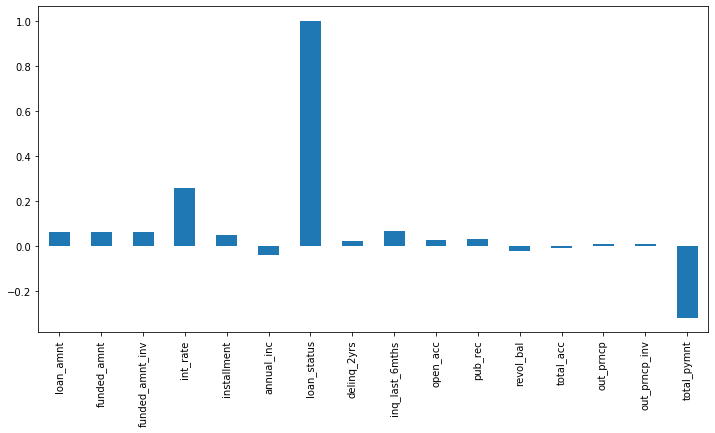

In [110]:
corr.plot(kind='bar', figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026435098688>,
      dtype=object)

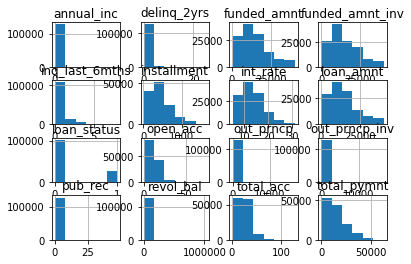

In [111]:
df._get_numeric_data().hist(bins=6)

In [120]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt
0,22000,22000,22000.0,36 months,9.17,701.34,B,B2,RENT,73000.0,...,Sep-1999,2.0,7.0,0.0,33797,22.0,f,0.0,0.0,25251.046476
1,8000,8000,8000.0,36 months,5.32,240.92,A,A1,MORTGAGE,89000.0,...,Dec-2001,0.0,8.0,1.0,5405,16.0,f,0.0,0.0,8602.708787


In [119]:
#selecting categorical variables in the data frame
categ = df.select_dtypes(include=['object'])
categ.head(2)

,term,grade,sub_grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status
0,36 months,B,B2,RENT,Source Verified,Jun-2015,n,debt_consolidation,913xx,CA,Sep-1999,f
1,36 months,A,A1,MORTGAGE,Not Verified,Aug-2016,n,debt_consolidation,740xx,OK,Dec-2001,f


In [216]:
df.grade.unique()

array(['B', 'A', 'C', 'D', 'E', 'G', 'F'], dtype=object)

In [217]:
df['grade_map'] =df['grade'].map({'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0})
df['grade_map']

0         5
1         6
2         5
3         4
4         5
         ..
127309    6
127310    6
127311    5
127312    4
127313    5
Name: grade_map, Length: 127314, dtype: int64

In [218]:
df.verification_status.unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [219]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,grade_map
0,22000,22000,22000.0,36 months,9.17,701.34,B,B2,RENT,73000.0,...,2.0,7.0,0.0,33797,22.0,f,0.0,0.0,25251.046476,5
1,8000,8000,8000.0,36 months,5.32,240.92,A,A1,MORTGAGE,89000.0,...,0.0,8.0,1.0,5405,16.0,f,0.0,0.0,8602.708787,6


In [220]:
df['loan_status'].sample().value_counts()

0    1
Name: loan_status, dtype: int64

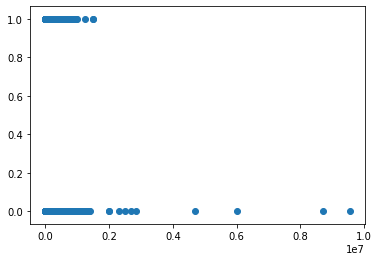

In [221]:
%matplotlib inline
plt.scatter(df['annual_inc'],df['loan_status'])
plt.show()

In [222]:
df.sample(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,grade_map
69601,12000,12000,12000.0,36 months,7.49,373.22,A,A4,MORTGAGE,88000.0,...,1.0,11.0,0.0,14241,24.0,w,0.0,0.0,12834.171904,6
93849,35000,35000,35000.0,60 months,12.62,789.57,C,C1,MORTGAGE,60000.0,...,1.0,25.0,0.0,29565,34.0,w,0.0,0.0,36561.357069,4


In [223]:
X = df[['int_rate', 'inq_last_6mths', 'funded_amnt','loan_amnt','funded_amnt_inv','delinq_2yrs','annual_inc','revol_bal','delinq_2yrs','open_acc', 'grade_map']]
y = df[['loan_status']]

In [224]:
df['grade_map'].unique()

array([5, 6, 4, 3, 2, 0, 1], dtype=int64)

In [225]:
y.head(2)

,loan_status
0,0
1,0


In [226]:
X.head(2)

,int_rate,inq_last_6mths,funded_amnt,loan_amnt,funded_amnt_inv,delinq_2yrs,annual_inc,revol_bal,delinq_2yrs,open_acc,grade_map
0,9.17,2.0,22000,22000,22000.0,0.0,73000.0,33797,0.0,7.0,5
1,5.32,0.0,8000,8000,8000.0,0.0,89000.0,5405,0.0,8.0,6


**Importing the Models**

In [227]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Feature Scaling**

In [229]:
minmax = MinMaxScaler()

In [230]:
columns = X_train.columns
columns 

Index(['int_rate', 'inq_last_6mths', 'funded_amnt', 'loan_amnt',
       'funded_amnt_inv', 'delinq_2yrs', 'annual_inc', 'revol_bal',
       'delinq_2yrs', 'open_acc', 'grade_map'],
      dtype='object')

In [231]:
minmax_train = minmax.fit_transform(X_train)

In [232]:
minmax_train = pd.DataFrame(minmax_train, columns = columns)
minmax_train.head()

,int_rate,inq_last_6mths,funded_amnt,loan_amnt,funded_amnt_inv,delinq_2yrs,annual_inc,revol_bal,delinq_2yrs,open_acc,grade_map
0,0.318536,0.250,0.153846,0.153846,0.1750,0.000000,0.012000,0.033829,0.000000,0.189189,0.666667
1,0.408489,0.125,0.179487,0.179487,0.2000,0.000000,0.011667,0.006983,0.000000,0.162162,0.666667
2,0.655763,0.125,0.294872,0.294872,0.3125,0.000000,0.007509,0.006681,0.000000,0.162162,0.333333
3,0.182243,0.375,0.220513,0.220513,0.2400,0.090909,0.004400,0.005068,0.090909,0.135135,0.833333
4,0.287383,0.000,0.487179,0.487179,0.5000,0.000000,0.011167,0.023803,0.000000,0.148649,0.666667


In [233]:
minmax_train.describe()

,int_rate,inq_last_6mths,funded_amnt,loan_amnt,funded_amnt_inv,delinq_2yrs,annual_inc,revol_bal,delinq_2yrs,open_acc,grade_map
count,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000,85300.000000
mean,0.309596,0.082302,0.344010,0.344219,0.359850,0.014381,0.012686,0.015913,0.014381,0.156407,0.708029
std,0.185380,0.117615,0.223110,0.223221,0.217567,0.039869,0.009702,0.021912,0.039869,0.073852,0.216410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172897,0.000000,0.179487,0.179487,0.197500,0.000000,0.007667,0.005818,0.000000,0.108108,0.500000
50%,0.289330,0.000000,0.282051,0.282051,0.300000,0.000000,0.010833,0.010889,0.000000,0.148649,0.666667
75%,0.417056,0.125000,0.487179,0.487179,0.500000,0.000000,0.015000,0.019173,0.000000,0.189189,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [234]:
minmax_train = minmax.fit_transform(X_train)
minmax_test = minmax.fit_transform(X_test)

**Logistic Regression**

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
model = LogisticRegression()

In [237]:
model.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
y_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [239]:
metrics.accuracy_score(y_predict,y_train)

0.7988980070339976

In [240]:
metrics.accuracy_score(y_test_predict,y_test)

0.7989717713143238

In [247]:
metrics.confusion_matrix(y_test,y_test_predict)

array([[33564,     1],
       [ 8445,     4]], dtype=int64)

In [250]:
metrics.classification_report(y_test,y_test_predict)

'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89     33565\n           1       0.80      0.00      0.00      8449\n\n    accuracy                           0.80     42014\n   macro avg       0.80      0.50      0.44     42014\nweighted avg       0.80      0.80      0.71     42014\n'

**support vector machine**

**Decision Tree Classifier**

In [241]:
model_tree = DecisionTreeClassifier()

In [242]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [243]:
tree_predict = model_tree.predict(X_test)
tree_predict

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [244]:
metrics.accuracy_score(y_test,tree_predict)

0.6929356881039653